In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow.keras import layers
from keras.datasets import imdb

from tensorflow.keras.layers import Bidirectional, Dense, Embedding, Flatten, LSTM
from tensorflow.keras import preprocessing
from tensorflow.keras.models import Sequential

NUM_WORDS = 10000
MAXLEN = 60

Using TensorFlow backend.


In [2]:
(train_x, train_y), (test_x, test_y) = imdb.load_data(num_words=NUM_WORDS)

In [3]:
word_index = imdb.get_word_index()

In [4]:
reversed_word_index = dict(zip(word_index.values(), word_index.keys()))

In [5]:
# Offset by 3 due to the padding, start of sequence, and unknown as starting codings

def decode_review(encoded_review, reversed_word_index):
    review = ' '.join([reversed_word_index.get(i - 3, '?') for i in encoded_review])
    return review

example_review = decode_review(train_x[100], reversed_word_index)

In [6]:
example_review

"? i am a great fan of david lynch and have everything that he's made on dvd except for hotel room the 2 hour twin peaks movie so when i found out about this i immediately grabbed it and and what is this it's a bunch of ? drawn black and white cartoons that are loud and foul mouthed and unfunny maybe i don't know what's good but maybe this is just a bunch of crap that was ? on the public under the name of david lynch to make a few bucks too let me make it clear that i didn't care about the foul language part but had to keep ? the sound because my neighbors might have all in all this is a highly disappointing release and may well have just been left in the ? box set as a curiosity i highly recommend you don't spend your money on this 2 out of 10"

In [7]:
def to_one_hot_encoding(sequences, dimension=NUM_WORDS):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [8]:
x_train = preprocessing.sequence.pad_sequences(train_x, maxlen=MAXLEN)
x_test = preprocessing.sequence.pad_sequences(test_x, maxlen=MAXLEN)

In [9]:
def basic_embedding_model():
    model = Sequential()
    model.add(Embedding(10000, 8, input_length=MAXLEN))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    return model

model = basic_embedding_model()
model.summary()

history = model.fit(x_train, train_y, epochs=10, batch_size=32, validation_split=0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 60, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 480)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 481       
Total params: 80,481
Trainable params: 80,481
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 2s 3ms/step - loss: 0.6482 - acc: 0.6508 - val_loss: 0.5379 - val_acc: 0.7716
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4361 - acc: 0.8169 - val_loss: 0.4094 - val_acc: 0.8110
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3451 - acc: 0.8531 - val_loss: 0.3844 - va

In [10]:
model = Sequential()
model.add(layers.Embedding(NUM_WORDS, 16, input_length=MAXLEN))
model.add(layers.LSTM(32))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 60, 16)            160000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                6272      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               8448      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 174,977
Trainable params: 174,977
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(x_train, train_y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 4s 7ms/step - loss: 0.4814 - accuracy: 0.7598 - val_loss: 0.3899 - val_accuracy: 0.8192
Epoch 2/10
625/625 [==============================] - 4s 6ms/step - loss: 0.3447 - accuracy: 0.8515 - val_loss: 0.3765 - val_accuracy: 0.8288
Epoch 3/10
625/625 [==============================] - 4s 6ms/step - loss: 0.3106 - accuracy: 0.8713 - val_loss: 0.4064 - val_accuracy: 0.8284
Epoch 4/10
625/625 [==============================] - 4s 6ms/step - loss: 0.2919 - accuracy: 0.8788 - val_loss: 0.4112 - val_accuracy: 0.8234
Epoch 5/10
625/625 [==============================] - 4s 6ms/step - loss: 0.2782 - accuracy: 0.8848 - val_loss: 0.3985 - val_accuracy: 0.8288
Epoch 6/10
625/625 [==============================] - 4s 6ms/step - loss: 0.2651 - accuracy: 0.8910 - val_loss: 0.3783 - val_accuracy: 0.8298
Epoch 7/10
625/625 [==============================] - 4s 6ms/step - loss: 0.2529 - accuracy: 0.8964 - val_loss: 0.3893 - val_accuracy: 0.8296
Epoch 

In [14]:
import shap

explainer = shap.DeepExplainer(model, x_train[:100])

#

In [19]:
type(explainer)

shap.explainers._deep.Deep

In [18]:
shap_values = explainer.shap_values(x_test[:10])

AttributeError: in user code:

    C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\shap\explainers\_deep\deep_tf.py:239 grad_graph  *
        out = self.model(shap_rAnD)
    C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__  **
        outputs = call_fn(inputs, *args, **kwargs)
    C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\keras\engine\sequential.py:372 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\keras\engine\functional.py:386 call
        inputs, training=training, mask=mask)
    C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\keras\layers\recurrent.py:663 __call__
        return super(RNN, self).__call__(inputs, **kwargs)
    C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\keras\layers\recurrent_v2.py:1183 call
        runtime) = lstm_with_backend_selection(**normal_lstm_kwargs)
    C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\keras\layers\recurrent_v2.py:1559 lstm_with_backend_selection
        function.register(defun_gpu_lstm, **params)
    C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\eager\function.py:3241 register
        concrete_func.add_gradient_functions_to_graph()
    C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\eager\function.py:2063 add_gradient_functions_to_graph
        self._delayed_rewrite_functions.forward_backward())
    C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\eager\function.py:621 forward_backward
        forward, backward = self._construct_forward_backward(num_doutputs)
    C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\eager\function.py:669 _construct_forward_backward
        func_graph=backwards_graph)
    C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\func_graph.py:986 func_graph_from_py_func
        func_outputs = python_func(*func_args, **func_kwargs)
    C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\eager\function.py:659 _backprop_function
        src_graph=self._func_graph)
    C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\ops\gradients_util.py:669 _GradientsHelper
        lambda: grad_fn(op, *out_grads))
    C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\ops\gradients_util.py:336 _MaybeCompile
        return grad_fn()  # Exit early
    C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\ops\gradients_util.py:669 <lambda>
        lambda: grad_fn(op, *out_grads))
    C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\shap\explainers\_deep\deep_tf.py:367 custom_grad
        out = op_handlers[type_name](self, op, *grads) # we cut off the shap_ prefex before the lookup
    C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\shap\explainers\_deep\deep_tf.py:656 handler
        return linearity_with_excluded_handler(input_inds, explainer, op, *grads)
    C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\shap\explainers\_deep\deep_tf.py:663 linearity_with_excluded_handler
        assert not explainer._variable_inputs(op)[i], str(i) + "th input to " + op.name + " cannot vary!"
    C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\shap\explainers\_deep\deep_tf.py:216 _variable_inputs
        out[i] = t.name in self.between_tensors

    AttributeError: 'TFDeep' object has no attribute 'between_tensors'


In [112]:
model.layers[1].output

<tf.Tensor 'lstm_12/PartitionedCall:0' shape=(None, 32) dtype=float32>

In [113]:
import keras.backend as K

In [115]:
model.input

<tf.Tensor 'embedding_14_input:0' shape=(None, 60) dtype=float32>

In [117]:
# Get output from intermediate layer to visualize activations
lstm = model.layers[1]

attn_func = K.function(inputs = [model.input],
           outputs = [model.layers[1].output]
          )

In [118]:
# get html element
def cstr(s, color='black'):
	if s == ' ':
		return "<text style=color:#000;padding-left:10px;background-color:{}> </text>".format(color, s)
	else:
		return "<text style=color:#000;background-color:{}>{} </text>".format(color, s)
	
# print html
def print_color(t):
	display(html_print(''.join([cstr(ti, color=ci) for ti,ci in t])))

# get appropriate color for value
def get_clr(value):
	colors = ['#85c2e1', '#89c4e2', '#95cae5', '#99cce6', '#a1d0e8'
		'#b2d9ec', '#baddee', '#c2e1f0', '#eff7fb', '#f9e8e8',
		'#f9e8e8', '#f9d4d4', '#f9bdbd', '#f8a8a8', '#f68f8f',
		'#f47676', '#f45f5f', '#f34343', '#f33b3b', '#f42e2e']
	value = int((value * 100) / 5)
	return colors[value]

# sigmoid function
def sigmoid(x):
	z = 1/(1 + np.exp(-x)) 
	return z

In [119]:
def visualize(output_values, result_list, cell_no):
	print("\nCell Number:", cell_no, "\n")
	text_colours = []
	for i in range(len(output_values)):
		text = (result_list[i], get_clr(output_values[i][cell_no]))
		text_colours.append(text)
	print_color(text_colours)

In [120]:
char_to_int = word_index
int_to_char = reversed_word_index

In [147]:
# Get Predictions from random sequence
def get_predictions(data, model):
    start = np.random.randint(0, len(data)-1)
    pattern = data[start]
    result_list, output_values = [], []
    print("Seed:")
    print("\"" + ''.join([int_to_char[value] for value in pattern]) + "\"")
    print("\nGenerated:")

    for i in range(1000):
        print(i)
        # Reshaping input array for predicting next character
        x = np.reshape(pattern, (1, len(pattern), 1))
        x = x / float(n_vocab)
        # Prediction
        prediction = model.predict(x, verbose=0)

        # LSTM Activations
        output = attn_func([x])[0][0]
        output = sigmoid(output)
        output_values.append(output)

        print(prediction)

        # Predicted Character
        index = np.argmax(prediction)
        result = int_to_char[index]

        # Preparing input for next character
        seq_in = [int_to_char[value] for value in pattern]
        pattern.append(index)
        pattern = pattern[1:len(pattern)]

        # Saving generated characters
        result_list.append(result)
    return output_values, result_list

In [148]:
n_chars = 10000
n_vocab = 10000

In [149]:
output_values, result_list = get_predictions(test_x[100:102], model)

for cell_no in [189, 435, 463]:
	visualize(output_values, result_list, cell_no)

Seed:
"theisaddstrapstheyofsurprisebrasyoustoryhimselfindaylightoutfunnyvariousandandandcoaldealtofrolesknowrecommendsnippetshometoofbeforeheansadleaderhavelookprettyinminutetakechildhoodgrudgeupiigirlbeenyoungerarefarmbeartointerestoldmoreitisoverbrhavingevenrecommendtakeofgenrequestarecavemacmurrayantonioandusescookingisnobodyandmeasurewhilebriefhewroteandwhoisdownbrsgfallingfilmstoandforheupimplybeenrequiresandbrbasedmotherdadrichardhollywood'sitscenemoviestonoitforhisisvery10iiwhathavecouldn'tenjoyi'dthemcharacterasincanknowgetbrdownsideandmomentsor"

Generated:
0
[[0.2250213]]


KeyError: 0

In [128]:
int_to_char[2]

'and'

In [64]:
from see_rnn import get_gradients, features_0D, features_1D, features_2D

In [90]:
grads_all = get_gradients(model, 1, x_test[100:110], test_y[100:110])

In [93]:
grads_all.shape

(10, 64)

In [91]:
x_test[100].shape

(60,)

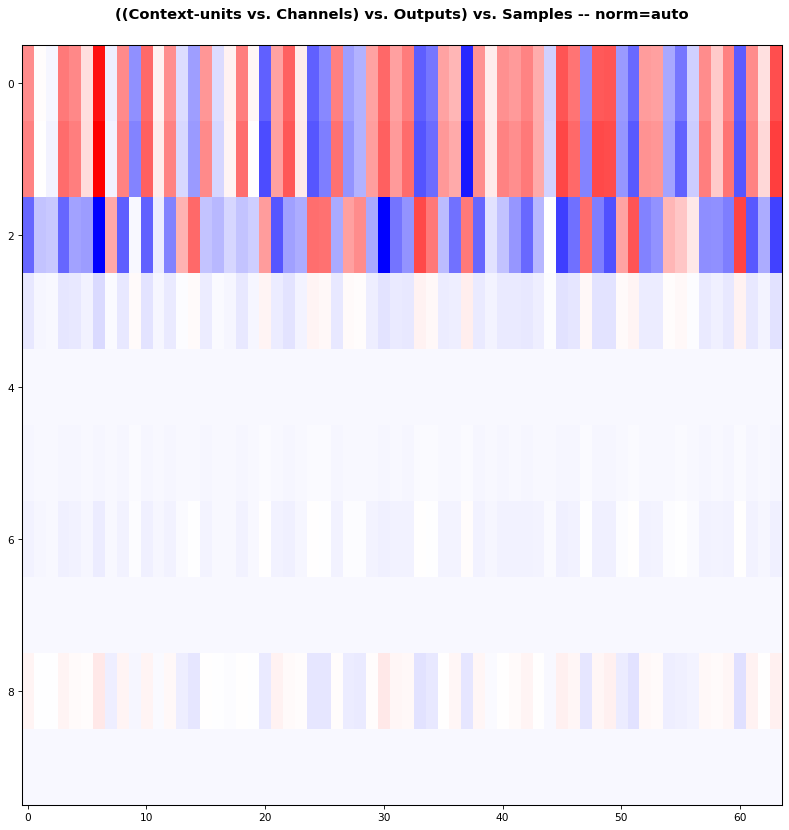

(<Figure size 760x760 with 1 Axes>,
 array(<matplotlib.axes._subplots.AxesSubplot object at 0x0000014C70A22588>,
       dtype=object))

In [92]:
features_2D(grads_all, n_rows=1, tight=True, borderwidth=1)

In [85]:
model.layers[0]

In [61]:
from tensorflow.keras import backend as K

lstm = model.layers[1]

activation_function = K.function(inputs = [model.get_input_at(0), K.learning_phase()], outputs = [lstm.output])

RuntimeError: The layer has never been called and thus has no defined input.

In [48]:
predictions = model.predict(x_test)

In [46]:
x_test.shape

(25000, 60)

In [32]:
# Examplary test reviews

In [33]:
example_review = decode_review(x_test[100], reversed_word_index)

In [34]:
print(example_review)

lovely ? backdrop these feelings are further ? by a cast of realistically likable characters and ? that are more amoral than cardboard ? of evil oh yeah george kennedy is here too and when is that not a good thing br br if you liked wrong turn then watch this to see where much of its' ? came from


In [40]:
print(predictions[1][100])

TypeError: 'float' object is not subscriptable

In [49]:
predictions[100]

array([0.6165469], dtype=float32)

In [53]:
model = Sequential()
model.add(layers.Embedding(NUM_WORDS, 8, input_length=MAXLEN))
model.add(layers.Bidirectional(layers.LSTM(32, return_sequences=True)))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [54]:
history = model.fit(x_train, train_y, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
625/625 [==============================] - 8s 13ms/step - loss: 0.4910 - accuracy: 0.7465 - val_loss: 0.3993 - val_accuracy: 0.8116
Epoch 2/20
625/625 [==============================] - 7s 11ms/step - loss: 0.3486 - accuracy: 0.8504 - val_loss: 0.3931 - val_accuracy: 0.8138
Epoch 3/20
625/625 [==============================] - 7s 12ms/step - loss: 0.3141 - accuracy: 0.8678 - val_loss: 0.3762 - val_accuracy: 0.8278
Epoch 4/20
625/625 [==============================] - 7s 11ms/step - loss: 0.2908 - accuracy: 0.8788 - val_loss: 0.3760 - val_accuracy: 0.8248
Epoch 5/20
625/625 [==============================] - 7s 12ms/step - loss: 0.2744 - accuracy: 0.8863 - val_loss: 0.4073 - val_accuracy: 0.8276
Epoch 6/20
625/625 [==============================] - 7s 12ms/step - loss: 0.2594 - accuracy: 0.8955 - val_loss: 0.4029 - val_accuracy: 0.8228
Epoch 7/20
625/625 [==============================] - 8s 12ms/step - loss: 0.2427 - accuracy: 0.9020 - val_loss: 0.4177 - val_accuracy: 0.8214

KeyboardInterrupt: 